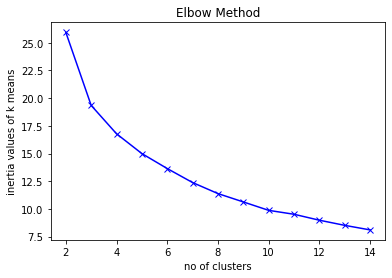

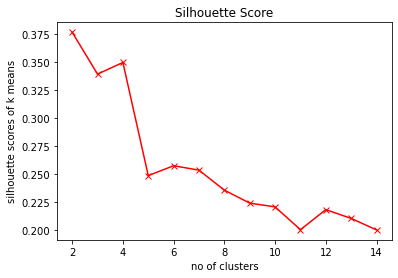

<Figure size 432x288 with 0 Axes>

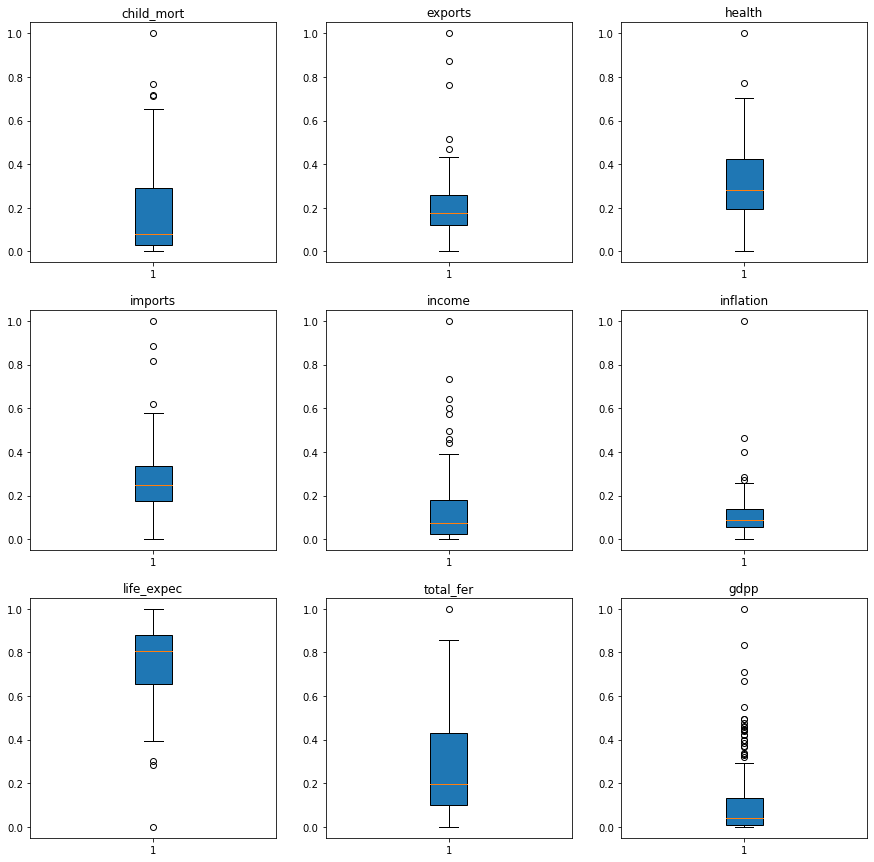

<Figure size 432x288 with 0 Axes>

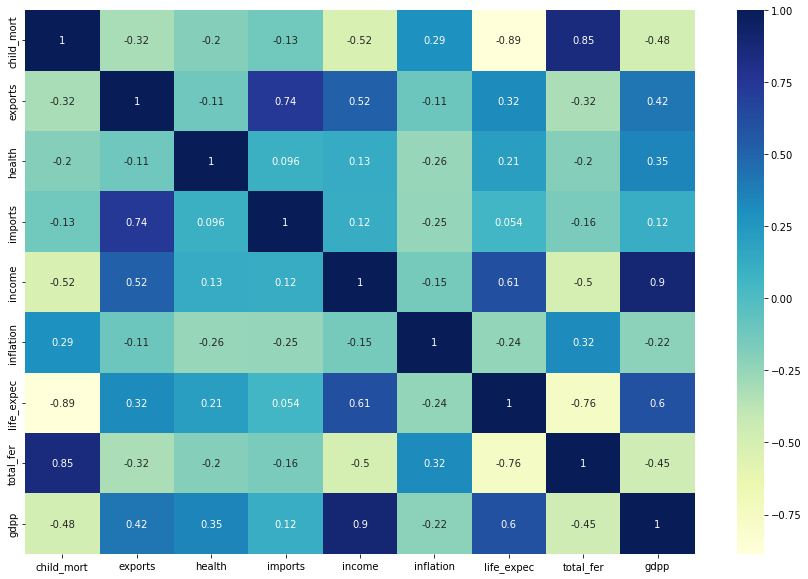

creating new centroid 

  initial centroid guessed is too far away creating new random centroid
creating new centroid 



<Figure size 432x288 with 0 Axes>

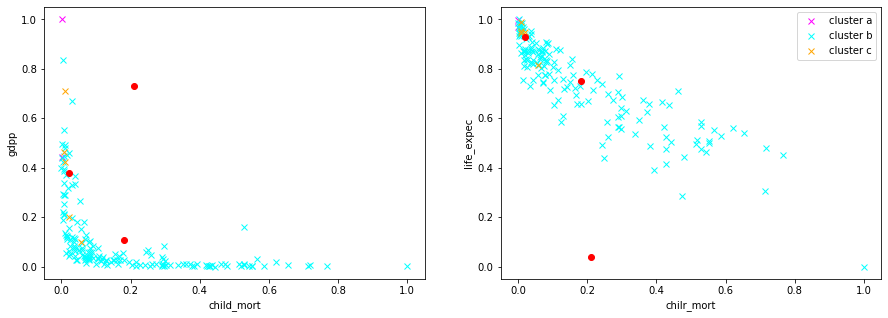

  initial centroid guessed is too far away creating new random centroid
creating new centroid 

  initial centroid guessed is too far away creating new random centroid
creating new centroid 

  initial centroid guessed is too far away creating new random centroid
creating new centroid 



<Figure size 432x288 with 0 Axes>

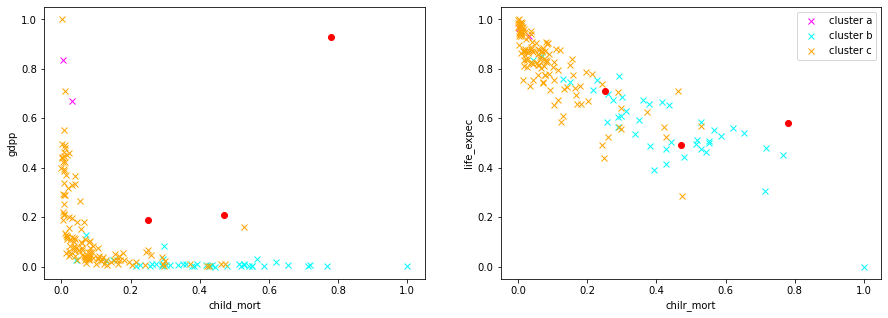

<Figure size 432x288 with 0 Axes>

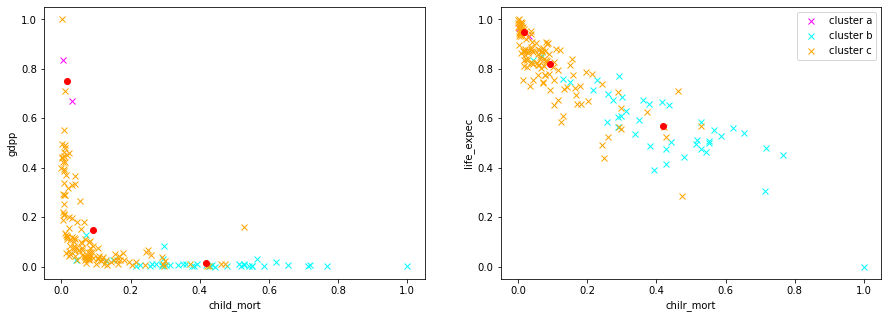

<Figure size 432x288 with 0 Axes>

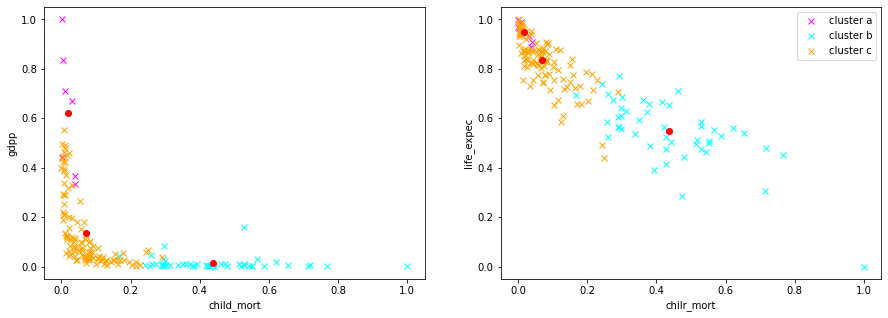

<Figure size 432x288 with 0 Axes>

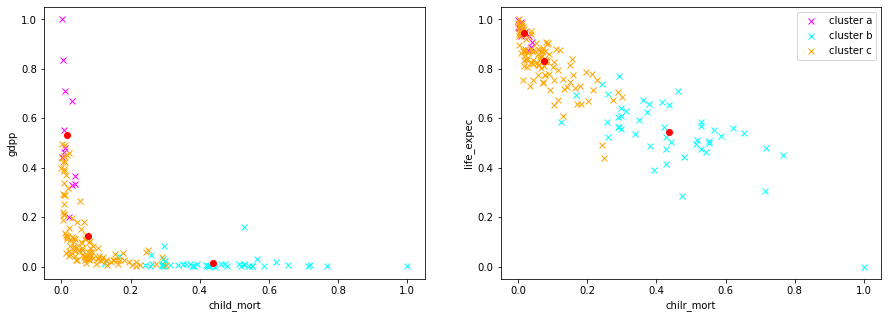

<Figure size 432x288 with 0 Axes>

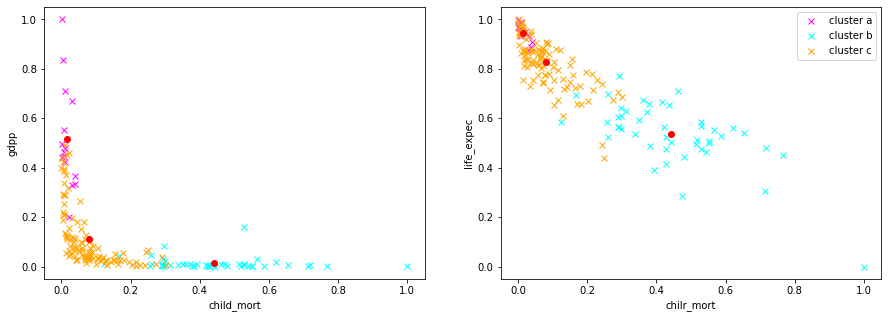

<Figure size 432x288 with 0 Axes>

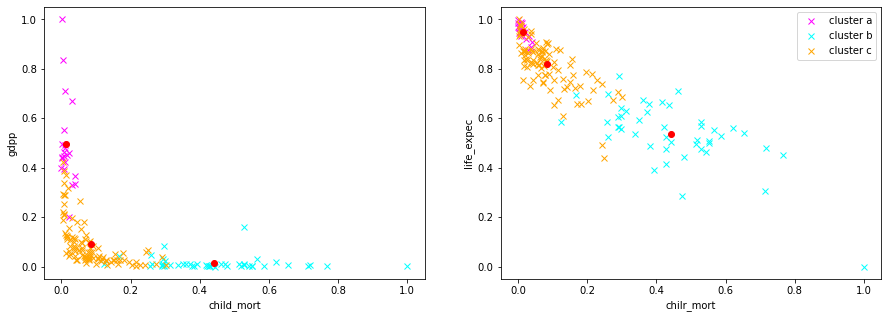

<Figure size 432x288 with 0 Axes>

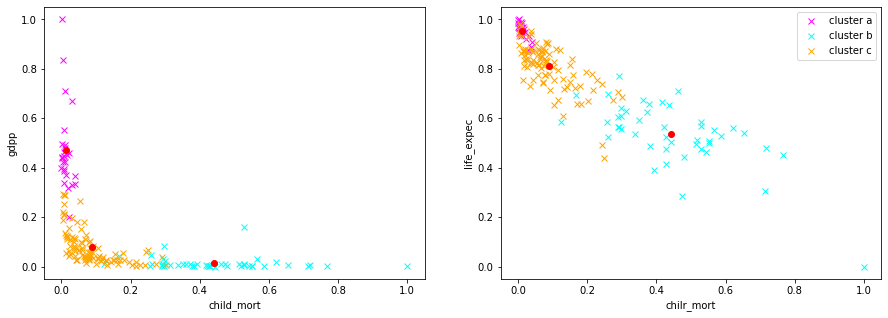

<Figure size 432x288 with 0 Axes>

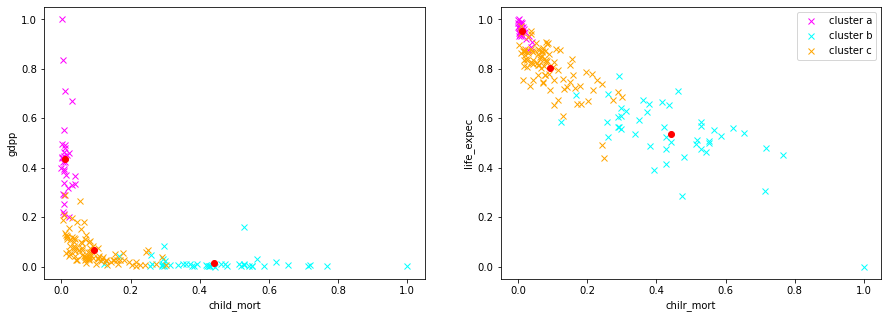

<Figure size 432x288 with 0 Axes>

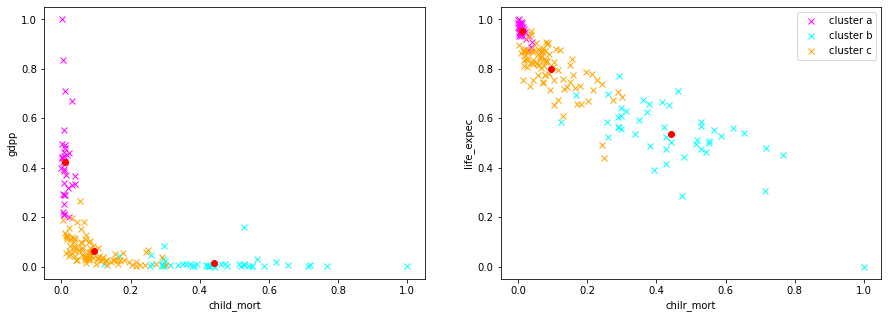

<Figure size 432x288 with 0 Axes>

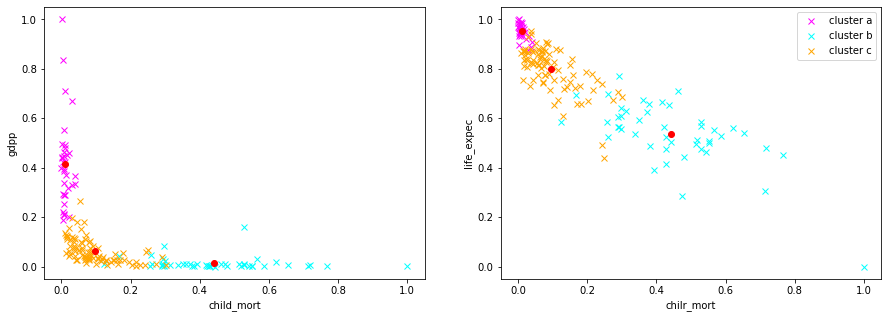

<Figure size 432x288 with 0 Axes>

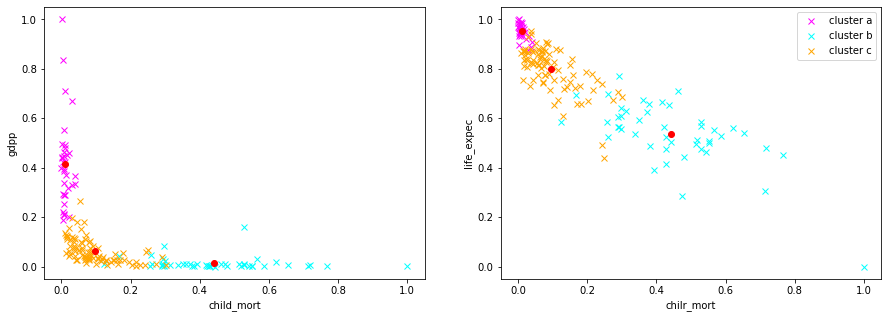

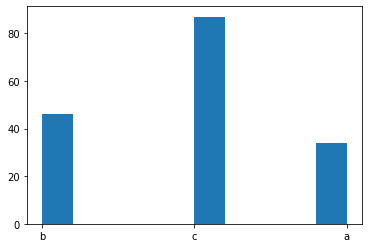

In [91]:
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
np.set_printoptions(suppress=True)
def data_cleaning():
    invalid_cells=[type('st'),'na','N/a']
    df=pd.read_csv('C:\Python\Assignments\MLAssignment\Country_data.csv',na_values=invalid_cells)
    df.set_index("country",
              inplace = True)
    return df
    pass
df=data_cleaning()
colors=['fuchsia','aqua','gold','brown','g','black','r','b','orange','pink']
scaler=MinMaxScaler()

for x in df.columns[0:9]:
    scaler.fit(np.array(df[x]).reshape(-1,1))
    df[x]=scaler.transform(np.array(df[x]).reshape(-1,1))
    df[x].round(2)

def plot_scores():
    SSO={'silhouette_score':[],'elbow':[]}
    for i in range(2,15):
        kmeans=KMeans(n_clusters=i)
        a=kmeans.fit_predict(df[df.columns[0:9]])
        SSO['elbow'].append(kmeans.inertia_)
        SSO['silhouette_score'].append(silhouette_score(df[df.columns[0:9]],a))
    plt.title("Elbow Method")
    plt.plot(list(range(2,15)),SSO['elbow'],marker='x',color='b',label='elbow')
    plt.xlabel('no of clusters')
    plt.ylabel('inertia values of k means')
    plt.show()
    plt.clf()
    plt.title("Silhouette Score")
    plt.plot(list(range(2,15)),SSO['silhouette_score'],marker='x',color='r',label='silhouette_score')
    plt.xlabel('no of clusters')
    plt.ylabel('silhouette scores of k means')
    plt.show()
    plt.clf()
plot_scores()



def boxPlot():
    ax=np.array([])
    fig, ax=plt.subplots(3,3,figsize=(15,15))
    ax=ax.reshape(1,9)


    for i in range(9):
        ax[0][i].boxplot(df[df.columns[i]],patch_artist=True)
        ax[0][i].set_title(df.columns[i])
    ax=ax.reshape(3,3)
    plt.show()
    plt.clf()
boxPlot()



def correlation_of_data():
    a=df[df.columns[0:9]].corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(a,annot=True,cmap="YlGnBu")
    plt.show()
    plt.clf()
correlation_of_data()



def kmeans_library():
    kmeans=KMeans(n_clusters=3)
    kmeans.fit(df[df.columns[0:9]])
    kmeans.predict(df[df.columns[0:9]])
    centroid=kmeans.cluster_centers_.round(2)
cluster=list('abcdefghijklmnop')
number_of_clusters=3


centroid_created =np.zeros((3,9))
def create_random_centroid():
    centroid=[]
    for i in range(number_of_clusters):
        centroid.append(random.sample(list(np.linspace(0,1,167).round(2)),9))
    global centroid_created ####### dude learnt new thing remember
    centroid_created=np.array(centroid)
    print('creating new centroid \n')
create_random_centroid()



def add_new_columns():
    for i in range(number_of_clusters):
        df[cluster[i]]=np.sqrt(sum((df[x]-centroid_created[i][ind])**2 for ind,x in enumerate(df.columns[0:9]))).round(2)
    df['min values']=df.iloc[:,9:(9+number_of_clusters)].idxmin(axis=1)
add_new_columns()



old_centroid=None
def move_centroids():## ask someone why we needed to send old_centroid,new_centroid instead of using them as global values
    global centroid_created,old_centroid
    for i in range(number_of_clusters):
        centroid_created[i]=df[df['min values']==cluster[i]][df.columns[0:9]].mean(axis=0) 
        if math.isnan(list(centroid_created[i])[0]):
            print("  initial centroid guessed is too far away creating new random centroid")
            create_random_centroid()
            add_new_columns()
    axs=[]
    fig, axs=plt.subplots(1,2,figsize=(15,5))
    for k in range(number_of_clusters):
        axs[0].plot(df[df['min values']==cluster[k]]['child_mort'],df[df['min values']==cluster[k]]['gdpp'],'x',color=colors[k],label=f'cluster {cluster[k]}')
        axs[1].plot(df[df['min values']==cluster[k]]['child_mort'],df[df['min values']==cluster[k]]['life_expec'],'x',color=colors[k],label=f'cluster {cluster[k]}')
    axs[0].plot(centroid_created[:,0],centroid_created[:,8],'o',color='r')
    axs[1].plot(centroid_created[:,0],centroid_created[:,6],'o',color='r')
    axs[0].set_xlabel('child_mort')
    axs[0].set_ylabel('gdpp')
    axs[1].set_xlabel('chilr_mort')
    axs[1].set_ylabel('life_expec')
    plt.legend()
    plt.show()
    plt.clf()
    add_new_columns()
    if str(centroid_created)!=old_centroid:
        old_centroid=str(centroid_created)
        move_centroids()
    else:
        plt.hist(df['min values'])
        plt.show()  
        return
move_centroids()


In [78]:
a=[1,2,3]
b=10
def aa():
    a[0]=3333
    print(b)
aa()
print(a,b)

10
[3333, 2, 3] 10
